In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import xgboost
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv('../input/hackerearth-how-not-to-lose-a-customer-in-10-days/train.csv',na_values=['?','-999','Error','xxxxxxxx'])
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,NaN,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,NaN,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,NaN,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df.isnull().sum()

customer_id                         0
Name                                0
age                                 0
gender                              0
security_no                         0
region_category                  5428
membership_category                 0
joining_date                        0
joined_through_referral          5438
referral_id                     17846
preferred_offer_types             288
medium_of_operation              5393
internet_option                     0
last_visit_time                     0
days_since_last_login            1999
avg_time_spent                      0
avg_transaction_value               0
avg_frequency_login_days         3522
points_in_wallet                 3443
used_special_discount               0
offer_application_preference        0
past_complaint                      0
complaint_status                    0
feedback                            0
churn_risk_score                    0
dtype: int64

In [4]:
df.shape

(36992, 25)

In [5]:
df=df.drop(['customer_id','Name','security_no','referral_id','last_visit_time'],axis=1)

In [6]:
df['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

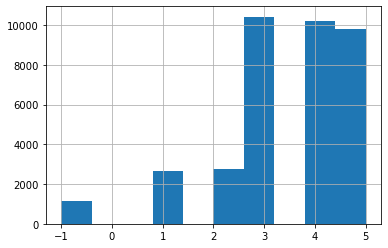

In [7]:
df['churn_risk_score'].hist()
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               31564 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joining_date                  36992 non-null  object 
 5   joined_through_referral       31554 non-null  object 
 6   preferred_offer_types         36704 non-null  object 
 7   medium_of_operation           31599 non-null  object 
 8   internet_option               36992 non-null  object 
 9   days_since_last_login         34993 non-null  float64
 10  avg_time_spent                36992 non-null  float64
 11  avg_transaction_value         36992 non-null  float64
 12  avg_frequency_login_days      33470 non-null  float64
 13  p

In [9]:
for i in df.columns:
    if df[i].dtype=='float64':
        df[i]=df[i].fillna(df[i].mean())
    else:
        df[i]=df[i].fillna(method='ffill')

In [10]:
df.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             1
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [11]:
df.fillna('Both',inplace=True)

In [12]:
df['joining_date']=df['joining_date'].apply(lambda x:int(x.split('-')[0]))

In [13]:
df.rename(columns={'joining_date':'joining_year'},inplace=True)

In [14]:
df1=pd.get_dummies(df,drop_first=True)

In [15]:
x=df1.drop('churn_risk_score',axis=1)
y=df1['churn_risk_score']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y)

In [17]:
xgb = xgboost.XGBClassifier(tree_method= 'gpu_hist')

In [18]:
xgb.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [19]:
pred=xgb.predict(x_test)

In [20]:
print(f1_score(y_test,pred,average='micro'))

0.7589189189189189


In [21]:
# params={'learning_rate':[0.05,0.1,0.15],
#       'max_depth':[2,4,6,8],
#       'min_child_weight':[1,3,5],
#       'gamma':[0.2,0.3,0.4,0.5],
#       'colsample_bytree':[0.4,0.5,0.7]}

In [22]:
# model=RandomizedSearchCV(xgb,param_distributions=params,n_iter=100,cv=3,n_jobs=-1)
# model.fit(x,y)

In [23]:
# model.best_params_

In [24]:
model1 = xgboost.XGBClassifier(min_child_weight= 3,
 max_depth= 4,
 learning_rate= 0.1,
 gamma= 0.5,
 colsample_bytree= 0.7)

In [25]:
model1.fit(x,y)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
test=pd.read_csv('../input/hackerearth-how-not-to-lose-a-customer-in-10-days/test.csv',na_values=['?','-999','Error','xxxxxxxx'])
test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,NaN,...,12.0,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,NaN,...,11.0,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,NaN,...,18.0,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,NaN,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6.0,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [27]:
test=test.drop(['customer_id','Name','security_no','referral_id','last_visit_time'],axis=1)

In [28]:
for i in test.columns:
    if test[i].dtype=='float64':
        test[i]=test[i].fillna(test[i].mean())
    else:
        test[i]=test[i].fillna(method='ffill')

In [29]:
test['joining_date']=test['joining_date'].apply(lambda x:int(x.split('-')[0]))

In [30]:
test.rename(columns={'joining_date':'joining_year'},inplace=True)

In [31]:
test1=pd.get_dummies(test,drop_first=True)

In [32]:
result = model1.predict(test1)

In [33]:
test1 =pd.read_csv('../input/hackerearth-how-not-to-lose-a-customer-in-10-days/test.csv',na_values=['?','-999','Error','xxxxxxxx'])

In [34]:
submission = pd.DataFrame({
    'customer_id': test1['customer_id'],
    'churn_risk_score': result,
})

In [35]:
print(submission['churn_risk_score'].value_counts())

5    7853
3    5164
4    3892
1    1979
2    1031
Name: churn_risk_score, dtype: int64


In [36]:
submission.to_csv('sub.csv', index=False)